# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [2]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
                                 
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    
    return model

In [7]:
## 超參數設定
optim_type = ['sgd', 'rmsprop', 'adagrad', 'adam']
lr_list = [0.1, 0.001]
EPOCHS = 50
BATCH_SIZE = 256

In [11]:
results = {}
for lr in lr_list:
    for opt in optim_type:
        keras.backend.clear_session()
        if opt == 'sgd':
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=0.7)
        elif opt == 'rmsprop':
            optimizer = keras.optimizers.RMSprop(lr=lr)
        elif opt == 'adagrad':
            optimizer = keras.optimizers.Adagrad(lr=lr)
        else:
            optimizer = keras.optimizers.Adam(lr=lr)
        
        print(f"Run with optimizer = {opt}, lr = {lr}")
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
        
        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = f"model-{str(opt)}_lr-{str(lr)}" 
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
         

Run with optimizer = sgd, lr = 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 228s 5ms/step - loss: 14.4461 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 227s 5ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 226s 5ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 226s 5ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 222s 4ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 220s 4ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 219s 4ms/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 220s 4ms/step - loss: 14.4448 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 219s 4ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 219s 4ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 219s 4ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 218s 4ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 219s 4ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 220s 4ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 264s 5ms/step - loss: 14.4459 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 277s 6ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 254s 5ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 240s 5ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 240s 5ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 242s 5ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 250s 5ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 230s 5ms/step - loss: 2.1877 - acc: 0.2218 - val_loss: 2.0943 - val_acc: 0.2568
Epoch 2/50
50000/50000 [==============================] - 232s 5ms/step - loss: 2.0381 - acc: 0.2907 - val_loss: 1.9865 - val_acc: 0.3068
Epoch 3/50
50000/50000 [==============================] - 237s 5ms/step - loss: 1.9561 - acc: 0.3177 - val_loss: 1.9225 - val_acc: 0.3322
Epoch 4/50
50000/50000 [==============================] - 233s 5ms/step - loss: 1.9041 - acc: 0.3361 - val_loss: 1.8835 - val_acc: 0.3454
Epoch 5/50
50000/50000 [==============================] - 234s 5ms/step - loss: 1.8663 - acc: 0.3491 - val_loss: 1.8489 - val_acc: 0.3573
Epoch 6/50
50000/50000 [==============================] - 230s 5ms/step - loss: 1.8364 - acc: 0.3599 - val_loss: 1.8230 - val_acc: 0.3631
Epoch 7/50
50000/50000 [==============================] - 233s 5ms/step - loss: 1.8114 - acc: 0.3685 - val_loss: 1.8021 - val_acc: 0.3703
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 224s 4ms/step - loss: 1.8824 - acc: 0.3209 - val_loss: 2.1663 - val_acc: 0.2467
Epoch 3/50
50000/50000 [==============================] - 231s 5ms/step - loss: 1.7853 - acc: 0.3587 - val_loss: 1.7718 - val_acc: 0.3682
Epoch 4/50
50000/50000 [==============================] - 225s 5ms/step - loss: 1.7147 - acc: 0.3849 - val_loss: 1.7871 - val_acc: 0.3692
Epoch 5/50
50000/50000 [==============================] - 223s 4ms/step - loss: 1.6541 - acc: 0.4081 - val_loss: 1.6947 - val_acc: 0.4001
Epoch 6/50
50000/50000 [==============================] - 226s 5ms/step - loss: 1.6106 - acc: 0.4259 - val_loss: 1.6721 - val_acc: 0.4068
Epoch 7/50
50000/50000 [==============================] - 223s 4ms/step - loss: 1.5691 - acc: 0.4376 - val_loss: 1.5711 - val_acc: 0.4364
Epoch 8/50
50000/50000 [==============================] - 229s 5ms/step - loss: 1.5338 - acc: 0.4514 - val_loss: 1.6852 - val_acc: 0.3996
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 218s 4ms/step - loss: 1.7232 - acc: 0.3925 - val_loss: 1.7438 - val_acc: 0.3744
Epoch 4/50
50000/50000 [==============================] - 218s 4ms/step - loss: 1.6738 - acc: 0.4130 - val_loss: 1.6903 - val_acc: 0.4059
Epoch 5/50
50000/50000 [==============================] - 244s 5ms/step - loss: 1.6399 - acc: 0.4242 - val_loss: 1.6703 - val_acc: 0.4065
Epoch 6/50
50000/50000 [==============================] - 229s 5ms/step - loss: 1.6107 - acc: 0.4343 - val_loss: 1.6378 - val_acc: 0.4202
Epoch 7/50
50000/50000 [==============================] - 221s 4ms/step - loss: 1.5874 - acc: 0.4443 - val_loss: 1.6440 - val_acc: 0.4151
Epoch 8/50
50000/50000 [==============================] - 224s 4ms/step - loss: 1.5667 - acc: 0.4534 - val_loss: 1.6405 - val_acc: 0.4204
Epoch 9/50
50000/50000 [==============================] - 218s 4ms/step - loss: 1.5483 - acc: 0.4584 - val_loss: 1.5552 - val_acc: 0.4522
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 224s 4ms/step - loss: 1.5594 - acc: 0.4442 - val_loss: 1.5376 - val_acc: 0.4487
Epoch 5/50
50000/50000 [==============================] - 230s 5ms/step - loss: 1.5074 - acc: 0.4614 - val_loss: 1.5445 - val_acc: 0.4531
Epoch 6/50
50000/50000 [==============================] - 269s 5ms/step - loss: 1.4755 - acc: 0.4743 - val_loss: 1.4941 - val_acc: 0.4773
Epoch 7/50
50000/50000 [==============================] - 231s 5ms/step - loss: 1.4451 - acc: 0.4830 - val_loss: 1.4662 - val_acc: 0.4795
Epoch 8/50
50000/50000 [==============================] - 228s 5ms/step - loss: 1.4046 - acc: 0.5012 - val_loss: 1.4535 - val_acc: 0.4841
Epoch 9/50
50000/50000 [==============================] - 221s 4ms/step - loss: 1.3771 - acc: 0.5114 - val_loss: 1.4397 - val_acc: 0.4939
Epoch 10/50
50000/50000 [==============================] - 223s 4ms/step - loss: 1.3603 - acc: 0.5153 - val_loss: 1.4328 - val_acc: 0.4920
Epoch 11/50
50000/50000 [===================

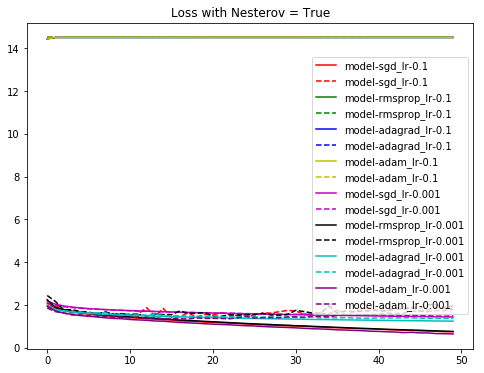

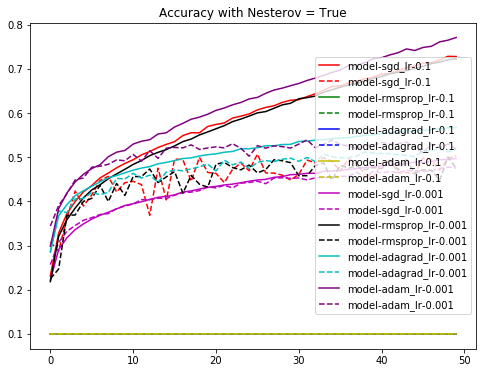

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k","c","purple"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss with Nesterov = True")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy with Nesterov = True")
plt.legend()
plt.show()